In [ ]:
%matplotlib inline

## Floating point arithmetic

- Need to be careful
- Represents a finite number of numbers
- A brief look

## Some basic issues


In [ ]:
x = 0.003
y = 0.002
z = 0.025

In [ ]:
# What do you expect?
print(1.0 + 1000 * x)
print(1.0 + 1000 * y)
print(1.0 + 1000 * z)

In [ ]:
a = 1.0
for i in range(1000):
    a += 0.002
print(a)

In [ ]:
if a != 3.0:
    print("Python does not know maths!")


In [ ]:
a = 1.0
while a != 3.0:
    a += 0.002
print(a)

## What is going on?

- Most numbers cannot be stored exactly on the computer
- Addition introduces roundoff
- Effects are cumulative
- **Never** use exact comparisons


An example

In [ ]:
a = 1.0
EPSILON = 1e-6  # or equivalently 0.0000001
while abs(a - 3.0) >= EPSILON:
    a += 0.002
print(a)

## Binary number representations

- What is 27 in binary?
- What is 0.25 in binary?
- What is 0.1 in binary?


## Floating point numbers

- Finite size mantissa
- Finite size exponent
- A base for the numbers

<br/>

- Consider a decimal number system with 3 significant places
- Consider 10.1 - 9.93 (= 0.17)
- First equate the exponents; then subtract
- You get $1.01 \times 10^1 - 0.99 \times 10^1 $ = 0.02
- Subtraction can be catastrophic


## Epsilon of the machine

- Smallest number when added to 1.0 that changes it

In [ ]:
2**-53

In [ ]:
eps = 1.0
while (1.0 + eps) > 1.0:
    eps = eps*0.5
print(eps)

## IEEE 754 standard

- single precision: sign(1), exponent (8), matissa (23)
- double precision: sign(1), exponent (11), matissa (53)

- Reserve numbers for zero, infinity, NaN and denormalized numbers


## Special numbers


| Exponent     | Fraction  | Value                   |
| ------------ | --------- | ----------------------  |
| $e_{min} -1$ | $f= 0$    | $\pm 0$                 |
| $e_{min} -1$ | $f\neq 0$ | $0.f\times 2^{e_{min}}$ |
| $e_{max} +1$ | $f=0$     | $\infty$                |
| $e_{max} +1$ | $f\neq0$  | NaN                     |



See this!

In [ ]:
float('nan')

In [1]:
float('inf')

inf

## Catastrophic cancellation

- $a = 1.23, b=1.244$ with 3 significant places
- $b - a = 0.01$ which is wrong (1.40)
- Only one place is correct
- Called loss of significance!
- Change your computation


## Numerical derivatives

- Let us compute $\frac{d (sin(x))}{dx}$ at $x=\pi/4$


In [2]:
import numpy as np
x = np.pi/4
exact = np.cos(x)
dx = 1.0
errors, dxs = [], []
epsilon = 2**-60
while dx > epsilon:
    deriv = (np.sin(x + dx) - np.sin(x))/dx
    error = abs(deriv - exact)
    errors.append(error)
    dxs.append(dx)
    dx *= 0.5

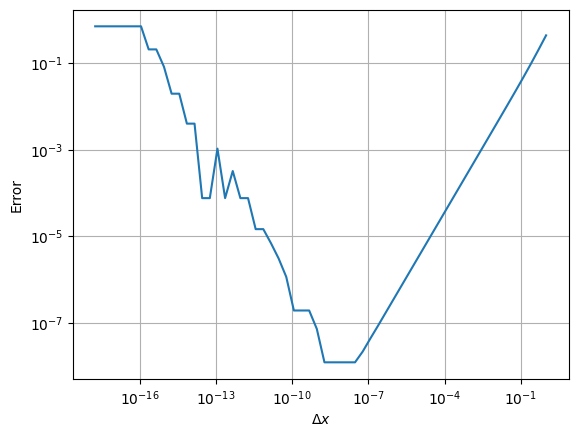

In [3]:
from matplotlib import pyplot as plt
plt.loglog(dxs, errors)
plt.grid()
plt.xlabel(r'$\Delta x$'); plt.ylabel('Error');

## Higher order derivatives

<img height="80%" src="images/fd.png" align="center"/>



## Homework

- Plot $f(x) = (1 - \cos x) / x^2$
- In the region $x \in [-4 \times 10^{-8}, 4 \times 10^{-8}]$



In [6]:
x = np.linspace(-4e-8, 4e-8, 1000)
y = (1 - np.cos(x))/x**2

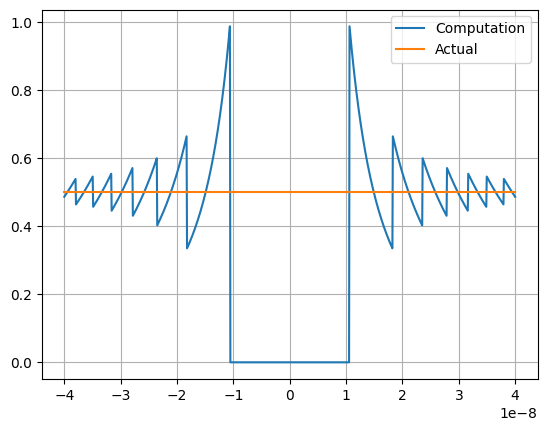

In [9]:
from matplotlib import pyplot as plt
plt.plot(x, y, label = 'Computation')
plt.plot(x, np.ones_like(x)*0.5, label = 'Actual')
plt.legend()
plt.grid()

## Summary

- Avoid adding large quantity to a small one
- Avoid catastrophic cancellation
- Careful when subtracting close quantities
- Compare floats carefully
- Useful to know what the function should look like
- Use libraries that are better tested


## More information

- See this: https://floating-point-gui.de
